In [1]:
import tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import numpy as np
from scipy.optimize import curve_fit

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + 'cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
leg_font = font_manager.FontProperties(size=12)
font = {'color':'black','size':14}
_axis = {'size':12}
ufile1 = "../data/file1k100us.csv"
file2 = "../data/filelow.csv"
file3= "../data/file100001.csv"
med_init = tools.files(ufile1)
low_init = tools.files(file2)
high_init = tools.files(file3)

## UP TO 10kHz

### Raw

/tmp/ipykernel_24656/3505401431.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


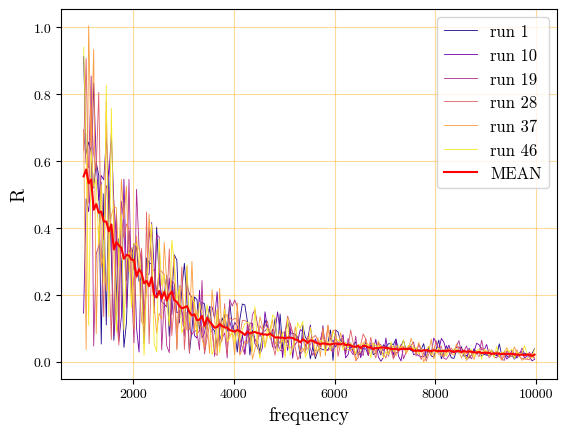

In [2]:
diff_data, colormap = med_init.shady_plot("plasma")
data = med_init.get_mean()
total_points=5
fig, ax = plt.subplots()
for i in range(1,len(diff_data),int(len(diff_data)/total_points)):
    ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"run {i}",linewidth= .6)
ax.plot(data[:,0],data[:,1],"r",label="MEAN",linewidth =1.5)
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("R",fontdict=font)
# ax.set_title("RAW data: Noise for sub 10k frequency with TIME CONSTANT=100$\mu s$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("raw_1000_100us.png",dpi=700)

### Analysed

/home/vijay/Projects/shotnoise/env/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_10800/3752702670.py:26: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


flicker noise parameter A = -0.027945847035305362/y and B = 183.18900947999956/$y^2$ 5.942927349966472e-07
white noise parameter 1.305593689e-07


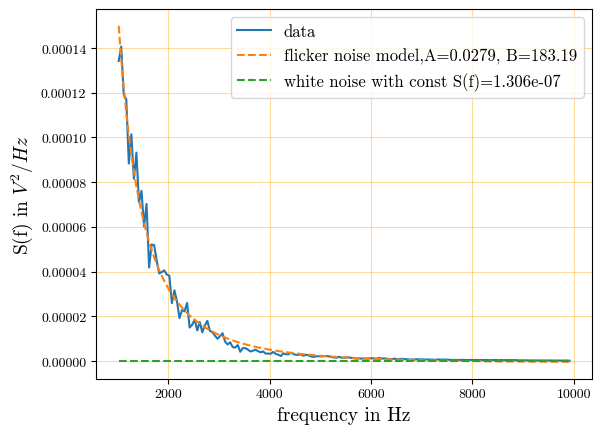

In [2]:
# data sorting as lower deviation
data0 = med_init.sort_on_deviation(10)
data00,data01 = med_init.point_mean(data0)

# ENBW corrected values of S(f)
data01 = np.square(data01)/(2*1250)

# linearity limit correction guess work
limit = 178

# models for noise fitting
def flicker_noise(y,A,B,C):
    return (A/y)+(B/y**2)+C

def white(y,c):
    return 0.0*y+c

# Curve fitting
param, param_cov = curve_fit(flicker_noise, data00[:],data01[:])
param_white, param_cov_white = curve_fit(white,data00[limit:],data01[limit:])
print(f"flicker noise parameter A = {param[0]}/y and B = {param[1]}/$y^2$ {param[2]}")
print(f"white noise parameter {param_white[0]}")


# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[:],flicker_noise(data00[:],param[0],param[1],param[2]),label=f"flicker noise model,A={abs(round(param[0],4))}, B={round(param[1],2)}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0],10)}",linestyle="dashed")
ax.set_xlabel("frequency in Hz",fontdict=font)
ax.set_ylabel("S(f) in $V^2/Hz$",fontdict=font)
# ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$us$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_1000_100us.png",dpi=700)


## very Low up to 1 Hz

/tmp/ipykernel_24656/3346668333.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


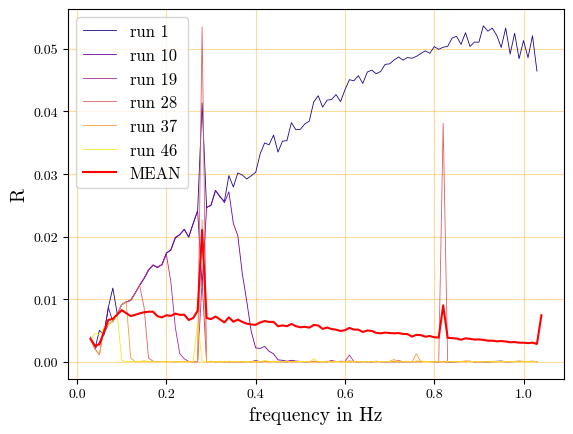

In [6]:
diff_data, colormap = low_init.shady_plot("plasma")
data = low_init.get_mean()
total_points=5
fig, ax = plt.subplots()
for i in range(1,len(diff_data),int(len(diff_data)/total_points)):
    ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"run {i}",linewidth= .6)
ax.plot(data[:,0],data[:,1],"r",label="MEAN",linewidth =1.5)
ax.set_xlabel("frequency in Hz",fontdict=font)
ax.set_ylabel("R",fontdict=font)
# ax.set_title("RAW data: Noise for sub 10k frequency with TIME CONSTANT=100$\mu s$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("raw_1_100ms.png",dpi=700)

### Analysed

[[0.03       0.00366366]
 [0.04       0.00256474]
 [0.05       0.00279891]
 [0.06       0.00480188]
 [0.07       0.00668214]
 [0.08       0.00684718]
 [0.09       0.00756839]
 [0.1        0.00825537]
 [0.11       0.0077758 ]
 [0.12       0.00731118]
 [0.13       0.00750551]
 [0.14       0.0077378 ]
 [0.15       0.00791217]
 [0.16       0.00800373]
 [0.17       0.00800562]
 [0.18       0.00728003]
 [0.19       0.00709443]
 [0.2        0.00743762]
 [0.21       0.00734232]
 [0.22       0.00770231]
 [0.23       0.00750051]
 [0.24       0.00753165]
 [0.25       0.0066809 ]
 [0.26       0.00699603]
 [0.27       0.00816551]
 [0.28       0.0210602 ]
 [0.29       0.00699354]
 [0.3        0.00682413]
 [0.31       0.00722896]
 [0.32       0.00677742]
 [0.33       0.00629288]
 [0.34       0.00710565]
 [0.35       0.00640125]
 [0.36       0.0067494 ]
 [0.37       0.00637944]
 [0.38       0.00608985]
 [0.39       0.00596839]
 [0.4        0.00591172]
 [0.41       0.00628729]
 [0.42       0.0065171 ]


/home/vijay/Projects/shotnoise/env/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_7698/3529831348.py:31: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


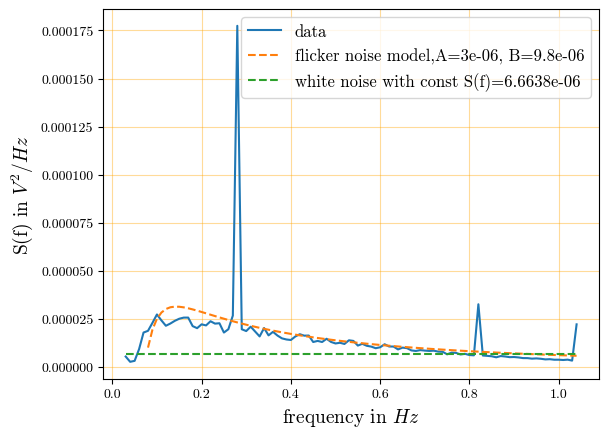

In [2]:

# data sorting as lower deviation
# data2,c =low_init.shady_plot()
# data0 = file2_init.sort_on_deviation(10)
# data0 = low_init.sort_on_deviation(10)
# data00,data01 = low_init.point_mean(data0)
diff_data, colormap = low_init.shady_plot("plasma")
data = low_init.get_mean()
data00,data01 = data[:,0],data[:,1]
print(data,len(data))
# ENBW corrected values of S(f)

# linearity guess
limit = 70

# models for noise fitting
def flicker_noise(y,A,B,C,D,E,F):
    return A+B/y+C/y**2
def white(y,c):
    return 0.0*y+c



data01 = np.square(data01)/(2*1.250)

param, param_cov = curve_fit(flicker_noise, data00[5:],data01[5:])
param_white, param_cov_white = curve_fit(white,data00[limit:],data01[limit:])
print(param)
print(param_white)

# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[5:],flicker_noise(data00[5:],param[0],param[1],param[2],param[3],param[4],param[5]),label=f"flicker noise model,A={abs(round(param[0],7))}, B={round(param[1],7)}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0],10)}",linestyle="dashed")
ax.set_xlabel("frequency in $Hz$",fontdict=font)
ax.set_ylabel("S(f) in $V^2/Hz$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_1_100ms.png",dpi=700)





# ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$ms$",fontdict=font)
# plt.savefig("final_1_100ms.png",dpi=700)

# # Curve fitting
# print("flicker noise parameter ", param)
# print("white noise parameter ",param_white)

# # ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$us$",fontdict=font)
# ax.grid(which="both",axis="both",color="orange",alpha=0.4)
# ax.legend(prop= leg_font)


## Up to 100kHz

### Raw

/tmp/ipykernel_24656/2864310830.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


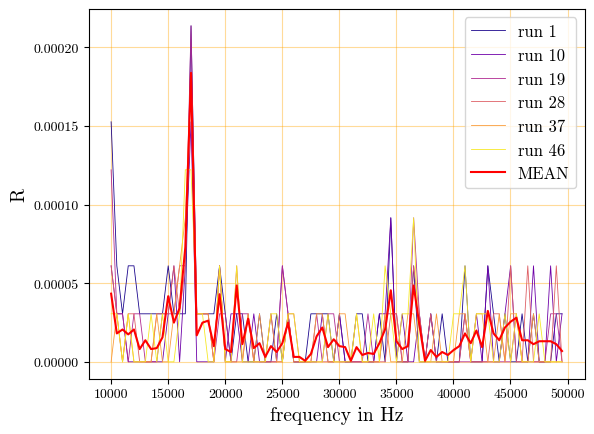

In [17]:
# diff_data, colormap = high_init.shady_plot("plasma")
# total_points=10
# fig, ax = plt.subplots()
# for i in range(0,len(diff_data),int(len(diff_data)/total_points)):
#     ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"data {i}",linewidth= .6)
# # ax.set(ylim=(0.0,0.0002))
# ax.legend()
# ax.set_xlabel("frequency")
# ax.set_ylabel("Vrms(Noise)")

diff_data, colormap = high_init.shady_plot("plasma")
data = high_init.get_mean()
total_points=5
fig, ax = plt.subplots()
for i in range(1,len(diff_data),int(len(diff_data)/total_points)):
    ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"run {i}",linewidth= .6)
    # ax.plot(diff_data[i][:,0],diff_data[i][:,1],'ro')
ax.plot(data[:,0],data[:,1],"r",label="MEAN",linewidth =1.5)
ax.set_xlabel("frequency in Hz",fontdict=font)
ax.set_ylabel("R",fontdict=font)
# # ax.set_title("RAW data: Noise for sub 10k frequency with TIME CONSTANT=100$\mu s$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("raw_10000_100ms.png",dpi=700)

### Analysed

flicker noise parameter  [ 1.17694942e-05 -4.40498840e-02]
white noise parameter  [3.5367046e-10]


/tmp/ipykernel_24656/2671143921.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()


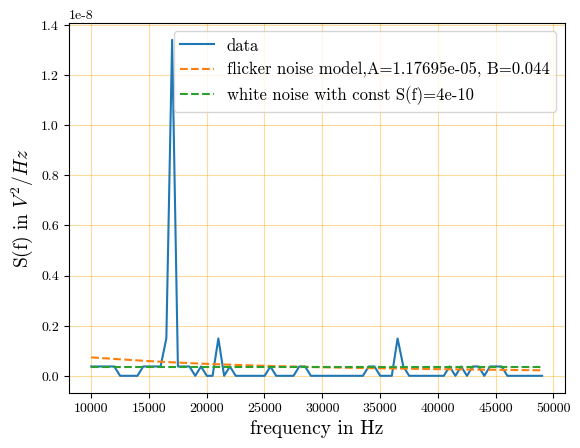

In [16]:
# data sorting as lower deviation)
data0 = high_init.sort_on_deviation(5)
data00,data01 = high_init.point_mean(data0)
# ENBW corrected values of S(f)
data01 = np.square(data01)/(2*1.250)

# linearity guess
limit = 150 

# models for noise fitting
def flicker_noise(y,A,B):
    return A/y+(B/y**2)

def white(y,c):
    return 0.0*y+c

# Curve fitting
param, param_cov = curve_fit(flicker_noise, data00[:],data01[:])
param_white, param_cov_white = curve_fit(white,data00[:],data01[:])
print("flicker noise parameter ", param)
print("white noise parameter ",param_white)
# plots
fig,ax = plt.subplots()
ax.plot(data00[:],data01[:],label="data")
ax.plot(data00[:],flicker_noise(data00[:],param[0],param[1]),label=f"flicker noise model,A={round(param[0],10)}, B={np.abs(round(param[1],3))}",linestyle="dashed")
ax.plot(data00[:],white(data00[:],param_white[0]),label=f"white noise with const S(f)={round(param_white[0],10)}",linestyle="dashed")
ax.set_xlabel("frequency in Hz",fontdict=font)
ax.set_ylabel("S(f) in $V^2/Hz$",fontdict=font)
# ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$ms$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("final_10000_100ms.png",dpi=700)


## Theoritical

/tmp/ipykernel_7222/2469447044.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig,ax = plt.subplots()
/tmp/ipykernel_7222/2469447044.py:3: RuntimeWarning: divide by zero encountered in divide
  return A/(y**alpha)


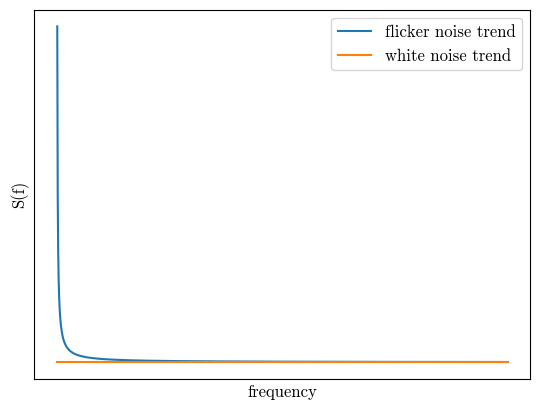

In [17]:
thx = np.linspace(0,1,1000)
def flicker_noise(y,A,alpha):
    return A/(y**alpha)
def white(y,c):
    return 0.0*y+c



fig,ax = plt.subplots()
ax.plot(thx,flicker_noise(thx,1,1),label="flicker noise trend")
ax.plot(thx,white(thx,.05),label="white noise trend")
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("S(f)",fontdict=font)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(prop= leg_font)
plt.savefig("thnoise.png",dpi=1000)



/tmp/ipykernel_24656/2102447473.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


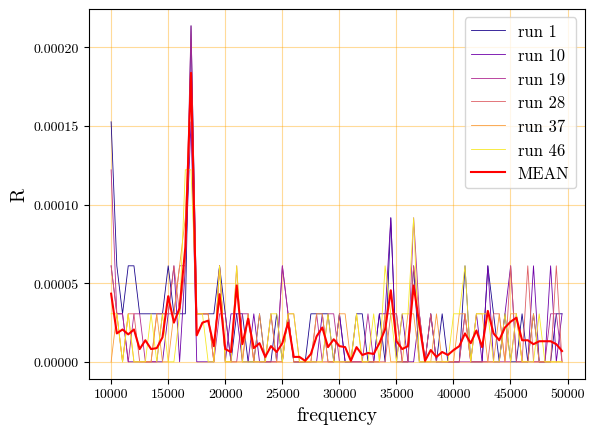

In [14]:
diff_data, colormap = high_init.shady_plot("plasma")
data = high_init.get_mean()
total_points=5
fig, ax = plt.subplots()
for i in range(1,len(diff_data),int(len(diff_data)/total_points)):
    ax.plot(diff_data[i][:,0],diff_data[i][:,1],color=colormap(i), label=f"run {i}",linewidth= .6)
    # ax.plot(diff_data[i][:,0],diff_data[i][:,1],'ro')
ax.plot(data[:,0],data[:,1],"r",label="MEAN",linewidth =1.5)
# ax.set(ylim=(0.0,0.001))
ax.set_xlabel("frequency",fontdict=font)
ax.set_ylabel("R",fontdict=font)
# ax.set_title("RAW data: Noise for sub 10k frequency with TIME CONSTANT=100$ms$",fontdict=font)
ax.grid(which="both",axis="both",color="orange",alpha=0.4)
ax.legend(prop= leg_font)
plt.savefig("raw10000100ms.png",dpi=1000)


In [7]:
# data sorting as lower deviation
# data0, colormap = ufile1_init.shady_plot()
data0 = file3_init.sort_on_deviation(10)
data00,data01 = file3_init.point_mean(data0)
# ENBW corrected values of S(f)
data01 = data01/

# linearity guess

# models for noise fittingb
def flicker_noise(y,A,alpha):
    return A/(y**alpha)

def white(y,c):
    return 0.0*y+c

 
def noisemodel(f,white,a,b):
    return white+(a/f)+(b/f**2)





# Curve fitting


param, param_cov = curve_fit(noisemodel, data00[:],data01[:])
print(param)
# param_white, param_cov_white = curve_fit(white,data00[limit:],data01[limit:])
# print("flicker noise parameter ", param)
# print("white noise parameter ",param_white)
# plots
# fig,ax = plt.subplots()
# for i in range(50):
    # ax.plot(data0[:][i][0],data0[:,i][j][1],'o',label="data")
# ax.plot(data00[:],noisemodel(data00[:],param[0],param[1],param[2],param[3],param[4]))
# ax.set_xlabel("frequency",fontdict=font)
# ax.set_ylabel("S(f)",fontdict=font)
# ax.set_title("final result after ENBW corrected spectral density TIME CONSTANT=100$us$",fontdict=font)
# ax.grid(which="both",axis="both",color="orange",alpha=0.4)
# ax.legend(prop= leg_font)


[-3.02066380e-07  2.49768431e-02 -1.41982516e+02]


In [47]:
print(data0[:][0][0])

[1.01800e+03 3.88613e-01]


In [7]:
# data sorting as lower deviation
data0 = file3_init.sort_on_deviation(10)
data00,data01 = file3_init.point_mean(data0)

# ENBW corrected values of S(f)
data01 = np.square(data01)/(2*1.25)



def noisemodel(f,white,a,b):
    return white+(a/f)+(b/f**2)





# Curve fitting


param, param_cov = curve_fit(noisemodel, data00[:],data01[:])
print(param)


[-1.22310683e-09  6.38763433e-05 -5.00548923e-01]
